<a href="https://colab.research.google.com/github/jpacilo/PythonWorkshop/blob/main/Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Better Practices** in Python For Data Science
⚠️ Please make a copy of this colab notebook first by clicking **File -> Save a Copy in Drive** on the menu bar <br>

## README

**Lecturer**
- Joshua Paolo Acilo
- Model Development Expert
- EDO Advanced Analytics

**Schedule**
- 2:00 - 3:30 PM Lecture
- 3:30 - 3:50 PM Quiz
- 3:50 - 4:00 PM Q&A

**Reminders**
- Feel free to ask questions anytime! You can leave a message in the chatbox or unmute yourself and speak. <br>
- This is not an Introduction to Python. I expect everyone to at least know the basics in programming. <br>
- You learn more by doing. Try to adopt this new concepts in your workflow next time!



## What to expect from me in this session

This afternoon we're going to talk about 🔬⚽📈♻️

## Setup Python

In [1]:
# check the current python version you have
import sys
sys.version

'3.7.12 (default, Jan 15 2022, 18:48:18) \n[GCC 7.5.0]'

In [2]:
# just to mute the warnings for deprecated methods
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pendulum is a library to manipulate dates
%%capture
!pip3 install pendulum

In [4]:
# geopandas is a library to manipulate spatial data
%%capture
!pip3 install geopandas

In [5]:
# leafmap is a library to visualize spatial data
%%capture
!pip3 install leafmap

In [6]:
# gives nicer output for your tests
%%capture
!pip3 -q install pytest pytest-sugar

## Write Clean Code 

Any fool can write code that a computer can understand. **Good programmers write code that humans can understand.** 🤔

Recap of some things to note when writing variables. <br>

**DON'T(s)**
- Thou shall not start with a number. <br>
```4ever = True```
- Thou shall not use special characters. <br>
```amountIn$ = 100```
- Thou shall not use reserved keywords. <br>
```id = 10012216```

**DO(s)**
- PEP8 suggests to use snake_case. <br>
```lower_case_with_underscores = True```

Use **meaningful and pronounceable variable names.** Let the variable speak for itself. 🤯

In [ ]:
import pendulum

def start_pipeline(date):
    # do stuff
    pass

# this is bad, not only it is unpronounceable, it is also vague and non-descriptive
ymddt = pendulum.now().strftime("%Y-%m-%d")
start_pipeline(ymddt)

# this is good, it gives me clue that the current date controls the timing of the pipeline
current_date = pendulum.now().strftime("%Y-%m-%d")
start_pipeline(current_date)

Of course, there will be some exceptions, especially in **domain-specific jargons.** 🧐

In [ ]:
import numpy as np

# you'll see this very often in the lake
pxn_dt = pendulum.parse(current_date).subtract(days=1)

# this is boilerplate ML, so it's okay too
X, y = np.arange(10).reshape((5, 2)), range(5)

It is a fact that *we will read more code than we will ever write.* It's important that **the code is readable and searchable.** Yes, we can proceed with the quick and dirty way and get the same result as compared to the slow and cleaner way, but in the long run this will hurt your readers. 😓

In [ ]:
def aggregate_features(window_duration):
    # do stuff
    pass

# i'm betting you'll forget this the next time you look at your code
aggregate_features(1440)

# we can assign a descriptive constant instead denoted by capital letters 
MINUTES_IN_A_DAY = 60 * 24
aggregate_features(MINUTES_IN_A_DAY)

Don't force the reader of your code to translate what the variable means. **Explicit is better than implicit.** 🤔

In [ ]:
# this is bad, implicit
seq = ("Taguig", "Makati", "Mandaluyong")
for item in seq:
    # do stuff
    pass

# this is good, explicit
cities = ("Taguig", "Makati", "Mandaluyong")
for city in cities:
    # do stuff
    pass

**Write a manual for your function using docstrings.** This will help not only you in the future, but also your future collaborators. 😉

In [ ]:
from math import radians, cos, sin, asin, sqrt

# this is good, write docstrings as much as possible to future proof your work
def get_haversine_distance(lon1, lat1, lon2, lat2, r=6371):
    """Calculate the great circle distance (in kilometers) between two points on the earth.

    Args:
        lon1 (float): Longitude of Point 1
        lat1 (float): Latitude of Point 1
        lon2 (float): Longitude of Point 2
        lat2 (float): Latitude of Point 2
        r (int, optional): Radius of earth in kilometers. Defaults to 6371.

    Returns:
        float: Haversine distance between the two given coordinates.
    """

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    return c * r

Your Python **functions should accomplish one thing.** When functions do more than one thing, they are harder to compose, test, and reason about. When you can isolate a function to just one action, they can be refactored easily and your code will read much cleaner.

In [ ]:
mkdir data

In [ ]:
cd data

/content/data


In [ ]:
%%capture
from google.colab import files
files.upload();

Saving cafes_in_bgc.csv to cafes_in_bgc.csv


{'cafes_in_bgc.csv': b'cafe_name,address,latitude,longitude\r\nSingle Origin - Bonifacio High Street,"C3, Bonifacio Highstreet, 7th Ave",14.551564,121.049615\r\nFrank & Dean Coffee,"Five/NEO, 31st Street, Taguig, Metro Manila",14.555208,121.043002\r\nCafe de Lipa,"H324+56C, Taguig, Metro Manila",14.550452,121.055519\r\nUCC Clockwork,"Burgos Cir, Taguig Metro Manila",14.55251,121.043906\r\nCoffee Project,"21st Dr, Taguig, 1630 Metro Manila",14.543019,121.047231\r\nStarbucks (Bonifacio High Street),H322+F23,14.551219,121.050066\r\nWildflour Cafe + Bakery BGC,"Ground Floor Six/NEO 4th Avenue, Corner 26th S...",14.549488,121.04616\r\nLuna Cafe,"Ground Floor, NAC Tower, 32nd St",14.553146,121.051328\r\nMalongo Atelier Barista Philippines,"3rd Avenue, Lower Ground, One Bonifacio High S...",14.551821,121.046074\r\nHighlands Coffee,"Arthaland Tower, 5th Ave",14.552934,121.047843\r\nThe Coffee Bean & Tea Leaf,"4th Floor, Central Square, 5 30th St",14.552077,121.048455\r\nLittle Flour Cafe - BGC

In [ ]:
cd /content

/content


In [ ]:
import pandas as pd

def load_data(filename, schema):
    df = pd.read_csv(filename)
    df = df.astype(schema, errors="ignore")
    return df

filename = "data/cafes_in_bgc.csv"
schema = {
    "cafe_name": str,
    "address": str,
    "latitude": float,
    "longitude": float
} 
df = load_data(filename, schema)
display(df)

,cafe_name,address,latitude,longitude
0,Single Origin - Bonifacio High Street,"C3, Bonifacio Highstreet, 7th Ave",14.551564,121.049615
1,Frank & Dean Coffee,"Five/NEO, 31st Street, Taguig, Metro Manila",14.555208,121.043002
2,Cafe de Lipa,"H324+56C, Taguig, Metro Manila",14.550452,121.055519
3,UCC Clockwork,"Burgos Cir, Taguig Metro Manila",14.552510,121.043906
4,Coffee Project,"21st Dr, Taguig, 1630 Metro Manila",14.543019,121.047231
5,Starbucks (Bonifacio High Street),H322+F23,14.551219,121.050066
6,Wildflour Cafe + Bakery BGC,"Ground Floor Six/NEO 4th Avenue, Corner 26th S...",14.549488,121.046160
7,Luna Cafe,"Ground Floor, NAC Tower, 32nd St",14.553146,121.051328
8,Malongo Atelier Barista Philippines,"3rd Avenue, Lower Ground, One Bonifacio High S...",14.551821,121.046074
9,Highlands Coffee,"Arthaland Tower, 5th Ave",14.552934,121.047843


Suppose you and your new DSP friends want to go coffee shop hopping in Bonifacio Global City today. Since you only have an hour for lunch break, you decided to only visit (n) shops for now. The task is to find the (n)-closest coffee shops to each other from the given data. 🧩 

In [ ]:
import leafmap
import itertools
import geopandas as gpd
from shapely.geometry import Polygon

In [ ]:
THE_GLOBE_TOWER_COORDS = (14.553474948859346, 121.04989287111896)

In [ ]:
# THIS IS BAD

def get_map(df, reference_point, n=3):

    # initialize map, set TGT as reference point for BGC
    map_select = leafmap.Map(
        center=reference_point, 
        zoom=16, 
        layers_control=True, 
        measure_control=False, 
        attribution_control=False
    )
    map_select.add_basemap("Stamen.TonerLite")

    # get points of interest df
    gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))
    gdf_points = gdf_points.drop(columns=["address", "latitude", "longitude"])

    cols_gdf = [(f"cafe_name_{i}", f"geometry_{i}") for i in range(1, n+1)]
    cols_gdf = [item for sublist in cols_gdf for item in sublist]
    cols_geometry = [col for col in cols_gdf if "geometry" in col]

    # get all possible combinations of poi(s) e.g. cafe(s)
    points_combinations = list(itertools.combinations(gdf_points.values.tolist(), n))
    
    # get polygons df
    gdf_polygons = pd.DataFrame(columns=cols_gdf)
    for i, points_combination in enumerate(points_combinations):
        gdf_polygons.loc[i] = [item for sublist in points_combination for item in sublist]

    # add n-polygon geometry column based from the given points 
    gdf_polygons["geometry"] = gdf_polygons.apply(lambda x: Polygon([x[col] for col in cols_geometry]), axis=1)
    gdf_polygons = gdf_polygons.drop(columns=cols_geometry)

    # 4326 for viz, 3857 for distance related calculations
    gdf_polygons = gpd.GeoDataFrame(gdf_polygons, crs="EPSG:4326")
    gdf_polygons["polygon_perimeter_in_meters"] = gdf_polygons.to_crs(3857)["geometry"].length

    # add the points and polygons gdf
    map_select.add_gdf(gdf_polygons.sort_values(by="polygon_perimeter_in_meters", ascending=True).head(1), layer_name="Smallest Geom", fill_colors=["green"])
    map_select.add_gdf(gdf_polygons.sort_values(by="polygon_perimeter_in_meters", ascending=False).head(1), layer_name="Biggest Geom", fill_colors=["red"])
    map_select.add_gdf(gdf_points, layer_name="Cafes in BGC")

    return map_select


In [ ]:
# THIS IS BETTER

def flatten_list(lst):
    flattened_list = [item for sublist in lst for item in sublist]
    return flattened_list

def get_column_names(n, geom):
    cols = flatten_list([(f"cafe_name_{i}", f"geometry_{i}") for i in range(1, n+1)])
    if geom:
        return [col for col in cols if "geometry" in col]
    else:
        return cols

def get_point_combinations(gdf_points, n):
    points_combinations = list(itertools.combinations(gdf_points.values.tolist(), n))
    return points_combinations

def get_gdf_points(df):
    gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))
    gdf_points = gdf_points.drop(columns=["address", "latitude", "longitude"])
    return gdf_points

def get_gdf_polygons(gdf_points, n):
    
    # get column names
    cols_gdf = get_column_names(n, False)
    cols_geometry = get_column_names(n, True)

    # get all possible combinations of poi(s) e.g. cafe(s)
    points_combinations = get_point_combinations(gdf_points, n)

    # create polygons table
    gdf_polygons = pd.DataFrame(columns=cols_gdf)
    for i, points_combination in enumerate(points_combinations):
        gdf_polygons.loc[i] = flatten_list(points_combination)

    # add n-polygon geometry column based from the given points 
    gdf_polygons["geometry"] = gdf_polygons.apply(lambda x: Polygon([x[col] for col in cols_geometry]), axis=1)
    gdf_polygons = gdf_polygons.drop(columns=cols_geometry)
    
    # 4326 for viz, 3857 for distance related calculations
    gdf_polygons = gpd.GeoDataFrame(gdf_polygons, crs="EPSG:4326")
    gdf_polygons["polygon_perimeter_in_meters"] = gdf_polygons.to_crs(3857)["geometry"].length

    return gdf_polygons

def get_map(reference_point, gdf_points, gdf_polygons):

    # initialize map, set TGT as reference point for BGC
    map_select = leafmap.Map(
        center=reference_point, 
        zoom=16, 
        layers_control=True, 
        measure_control=False, 
        attribution_control=False
    )
    map_select.add_basemap("Stamen.TonerLite")

    # add the points and polygons gdf
    map_select.add_gdf(gdf_polygons.sort_values(by="polygon_perimeter_in_meters", ascending=True).head(1), layer_name="Smallest Geom", fill_colors=["green"])
    map_select.add_gdf(gdf_polygons.sort_values(by="polygon_perimeter_in_meters", ascending=False).head(1), layer_name="Biggest Geom", fill_colors=["red"])
    map_select.add_gdf(gdf_points, layer_name="Cafes in BGC")

    return map_select

In [ ]:
gdf_points = get_gdf_points(df)
gdf_points.head(1)

,cafe_name,geometry
0,Single Origin - Bonifacio High Street,POINT (121.04962 14.55156)


In [ ]:
gdf_polygons = get_gdf_polygons(gdf_points, 4)
gdf_polygons.head(1)

,cafe_name_1,cafe_name_2,cafe_name_3,cafe_name_4,geometry,polygon_perimeter_in_meters
0,Single Origin - Bonifacio High Street,Frank & Dean Coffee,Cafe de Lipa,UCC Clockwork,"POLYGON ((121.04962 14.55156, 121.04300 14.555...",4303.005966


In [ ]:
gdf_polygons.sort_values(by="polygon_perimeter_in_meters", ascending=True).head(1)

,cafe_name_1,cafe_name_2,cafe_name_3,cafe_name_4,geometry,polygon_perimeter_in_meters
561,Single Origin - Bonifacio High Street,Starbucks (Bonifacio High Street),The Coffee Bean & Tea Leaf,St. Louis Cafe,"POLYGON ((121.04962 14.55156, 121.05007 14.551...",416.232713


In [ ]:
gdf_polygons.sort_values(by="polygon_perimeter_in_meters", ascending=False).head(1)

,cafe_name_1,cafe_name_2,cafe_name_3,cafe_name_4,geometry,polygon_perimeter_in_meters
969,Frank & Dean Coffee,Cafe de Lipa,UCC Clockwork,Coffee Project,"POLYGON ((121.04300 14.55521, 121.05552 14.550...",5442.486593


In [114]:
# get_map(THE_GLOBE_TOWER_COORDS, gdf_points, gdf_polygons)

**WHAT WE'VE COVERED**
- How to write clean variables
    - Make use of meaningful and pronounceable variable names, if possible.
    - Make your code readable and searchable with the use of constants.
    - Make use of explicit variable names, especially in lists.
- How to write clean functions
    - Write docstrings containing the input/output args and description.
    - Break down your functions to accomplish one thing. Don't repeat yourself.

## Write Tested Code
Just because you've counted all the trees **doesn't mean you've seen the forest.** 🤔

Basically, you should write tests for your data science projects because it:
- allows collaborators to **understand your code better**
- confirms that the code is **working as expected**
- helps in detecting **edge cases** or scenarios


Suppose we have this function that identifies the sentiment of an English text. 🧐

In [ ]:
from textblob import TextBlob

def extract_sentiment(text: str):
    """Extract text sentiments using textblob library
    Args:
        text (str): English text
    Returns:
        float: Polarity of the sentiment ranging from -1 to 1
    """

    text = TextBlob(text)
    sentiment = text.sentiment.polarity
    
    return sentiment

Since we will be using this library for the first time, we don't know how it reacts to different scenarios. We want to make sure that this tool or model is reliable, so **we will be testing it against multiple text inputs**, from the obvious scenarios to the rare ones or the edge cases.

In [ ]:
extract_sentiment("The weather is beautiful today!")

1.0

In [ ]:
extract_sentiment("I had a bad meeting yesterday.")

-0.6999999999999998

We want to be able to do this kind of testing next time, but it is better to do it in a modular kind of way. So we will be using *pytest* - it is a **framework that makes it easy to write small, readable tests**, and can scale to support complex functional testing for applications and libraries.

In [ ]:
mkdir src

In [ ]:
mkdir tests

In [ ]:
ls

data/  sample_data/  src/  tests/


In [ ]:
%%file src/sentiment.py

from textblob import TextBlob

def extract_sentiment(text: str):
    """Extract text sentiments using textblob library
    Args:
        text (str): English text
    Returns:
        float: Polarity of the sentiment ranging from -1 to 1
    """

    text = TextBlob(text)
    sentiment = text.sentiment.polarity
    
    return sentiment

Writing src/sentiment.py


In [ ]:
%%file tests/test_sentiment.py

import sys
import os.path
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir))
)
from src.sentiment import extract_sentiment

def test_extract_sentiment_positive():

    text = "I did well on the exam last week."
    sentiment = extract_sentiment(text)

    assert sentiment > 0

def test_extract_sentiment_negative():

    text = "This workshop is pretty basic and boring!"
    sentiment = extract_sentiment(text)

    assert sentiment < 0

def test_extract_sentiment_neutral():

    text = "..."
    sentiment = extract_sentiment(text)

    assert sentiment == 0

def test_extract_sentiment_filipino():

    text = "Nakakaengganyo pakinggan ang guro namin sa workshop"
    sentiment = extract_sentiment(text)

    assert sentiment > 0

Writing tests/test_sentiment.py


We will be calling the *pytest* from the terminal. This will loop through our script and run the functions that have a prefix of **test**. 🤯

In [ ]:
!python3 -m pytest -vv tests/test_sentiment.py

Test session starts (platform: linux, Python 3.7.12, pytest 3.6.4, pytest-sugar 0.9.4)
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1, sugar-0.9.4, anyio-3.5.0


――――――――――――――――――――――― test_extract_sentiment_positive ――――――――――――――――――――――――

    def test_extract_sentiment_positive():
    
        text = "I did well on the exam last week."
        sentiment = extract_sentiment(text)
    
>       assert sentiment > 0
E       assert 0.0 > 0

tests/test_sentiment.py:14: AssertionError

 tests/test_sentiment.py::test_extract_sentiment_positive ⨯       25% ██▌       
 tests/test_sentiment.py::test_extract_sentiment_negative ✓       50% █████     
 tests/test_sentiment.py::test_extract_sentiment_neutral ✓        75% ███████▌  

――――――――――――――――――――――― test_extract_sentiment_filipino ――――――――――――――――――――――――

    def test_extract_sentiment_filipino():
    
        text = "Nakakaengganyo pakinggan ang guro namin sa workshop"
        sentiment = extract_sentiment(

From the pytest output shown, we can see the scenarios where the function fails (e.g. the positive and filipino test inputs) and succeeds. From this exercise, **we are not only able to know whether our function works as expected but also know why it doesn’t work.** Based on result of the positive test input, we know that this sentiment identifier model from textblob isn't correct all the time. As the developer, we can now make an informed decision on what to do next. This shows the value of testing your work before using it in production. 🤩

We can also test multiple inputs using ```pytest.mark.parametrize```

In [ ]:
%%file tests/test_sentiment.py

import sys
import os.path
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir))
)
import pytest
from src.sentiment import extract_sentiment

test_inputs_positive = [
    "I am blessed with a wonderful family.",
    "I am thankful for my company.",
    "I am grateful for my friends."
]

test_inputs_negative = [
    "I feel bad for leaving the party early last night.",
    "I am still disappointed from my performance last week.",
    "I am too sick to travel tomorrow."
]

@pytest.mark.parametrize("text", test_inputs_positive)
def test_extract_sentiment_positive(text):

    sentiment = extract_sentiment(text)

    assert sentiment > 0

@pytest.mark.parametrize("text", test_inputs_negative)
def test_extract_sentiment_negative(text):

    sentiment = extract_sentiment(text)

    assert sentiment < 0

Overwriting tests/test_sentiment.py


In [ ]:
!python3 -m pytest -vv tests/test_sentiment.py

Test session starts (platform: linux, Python 3.7.12, pytest 3.6.4, pytest-sugar 0.9.4)
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1, sugar-0.9.4, anyio-3.5.0

 tests/test_sentiment.py::test_extract_sentiment_positive[I am blessed with a wonderful family.] ✓17% █▋        

―――――――― test_extract_sentiment_positive[I am thankful for my company.] ――――――――

text = 'I am thankful for my company.'

    @pytest.mark.parametrize("text", test_inputs_positive)
    def test_extract_sentiment_positive(text):
    
        sentiment = extract_sentiment(text)
    
>       assert sentiment > 0
E       assert 0.0 > 0

tests/test_sentiment.py:27: AssertionError

 tests/test_sentiment.py::test_extract_sentiment_positive[I am thankful for my company.] ⨯33% ███▍      

―――――――― test_extract_sentiment_positive[I am grateful for my friends.] ――――――――

text = 'I am grateful for my friends.'

    @pytest.mark.parametrize("text", test_inputs_positive)
    def test_extract_sentimen

There comes a time where the test cases in your script will be lengthy and comprehensive. We can choose to run a specific test function one at a time using this syntax ```pytest file.py::function_name```

In [ ]:
!python3 -m pytest -vv tests/test_sentiment.py::test_extract_sentiment_positive

Test session starts (platform: linux, Python 3.7.12, pytest 3.6.4, pytest-sugar 0.9.4)
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1, sugar-0.9.4, anyio-3.5.0

 tests/test_sentiment.py::test_extract_sentiment_positive[I am blessed with a wonderful family.] ✓33% ███▍      

―――――――― test_extract_sentiment_positive[I am thankful for my company.] ――――――――

text = 'I am thankful for my company.'

    @pytest.mark.parametrize("text", test_inputs_positive)
    def test_extract_sentiment_positive(text):
    
        sentiment = extract_sentiment(text)
    
>       assert sentiment > 0
E       assert 0.0 > 0

tests/test_sentiment.py:27: AssertionError

 tests/test_sentiment.py::test_extract_sentiment_positive[I am thankful for my company.] ⨯67% ██████▋   

―――――――― test_extract_sentiment_positive[I am grateful for my friends.] ――――――――

text = 'I am grateful for my friends.'

    @pytest.mark.parametrize("text", test_inputs_positive)
    def test_extract_sentimen

We can also choose to use the same test input data to different functions using ```pytest.fixture```

In [ ]:
%%file tests/test_sentiment.py

import sys
import os.path
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname(__file__), os.path.pardir))
)
import pytest
from src.sentiment import extract_sentiment

@pytest.fixture
def sample_data():
    return "I had mixed feelings about the concert last night."

def test_extract_sentiment_positive(sample_data):

    sentiment = extract_sentiment(sample_data)

    assert sentiment > 0

def test_extract_sentiment_negative(sample_data):

    sentiment = extract_sentiment(sample_data)

    assert sentiment < 0

def test_extract_sentiment_neutral(sample_data):

    sentiment = extract_sentiment(sample_data)

    assert sentiment == 0

Overwriting tests/test_sentiment.py


In [ ]:
!python3 -m pytest -vv tests/test_sentiment.py

Test session starts (platform: linux, Python 3.7.12, pytest 3.6.4, pytest-sugar 0.9.4)
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1, sugar-0.9.4, anyio-3.5.0


――――――――――――――――――――――― test_extract_sentiment_positive ――――――――――――――――――――――――

sample_data = 'I had mixed feelings about the concert last night.'

    def test_extract_sentiment_positive(sample_data):
    
        sentiment = extract_sentiment(sample_data)
    
>       assert sentiment > 0
E       assert 0.0 > 0

tests/test_sentiment.py:18: AssertionError

 tests/test_sentiment.py::test_extract_sentiment_positive ⨯       33% ███▍      

――――――――――――――――――――――― test_extract_sentiment_negative ――――――――――――――――――――――――

sample_data = 'I had mixed feelings about the concert last night.'

    def test_extract_sentiment_negative(sample_data):
    
        sentiment = extract_sentiment(sample_data)
    
>       assert sentiment < 0
E       assert 0.0 < 0

tests/test_sentiment.py:24: AssertionError

 t

**WHAT WE'VE COVERED**
- How to structure a basic test project
- How to use pytest in automating tests
    - How to run pytest and understand its results
    - How to test multiple inputs using pytest.mark.parametrize
    - How to pass common data to different functions using pytest.fixture

## Write Performant Code
Efficiency is **doing better** what is already being done. 🤔

On the following sections, we will be discussing some tips and tricks on **how to better optimize your code in terms of speed and memory utilization using the pandas library.** As developers, it pays off for us to read the official documentation of the packages we frequently use, it enables us to leverage on its strengths and quirks which improves the efficiency of our default processes, and who knows, maybe we'll discover something we can improve on in our future projects that we can share with everyone in the community! 😁

In [52]:
import pandas as pd
pd.__version__

'1.3.5'

The key data structure in pandas is called a ```DataFrame```. It is a two-dimensional table with rows and columns, which is similar to the tables in relational databases and R's dataframe. **One important thing to know is that pandas is column-major**, which means *consecutive elements in a column are stored next to each other in memory.* Since modern computers process sequential data more efficiently than non sequential data, **if a table is column-major, accessing its columns will be much faster than accessing its rows.** 🤯

To demonstrate this particular quirk of pandas, we will be using the **taxis dataset** that is readily available in the ```seaborn``` package.

In [57]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [55]:
df_taxis = sns.load_dataset("taxis")
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [56]:
len(df_taxis)

6433

A column in pandas ```DataFrame``` is called a ```Series```. Basically, a ```DataFrame``` is just a collection of ```Series``` stored to next to each other in memory.

In [58]:
# Fetch the column `pickup`, 1k loops
%timeit -n1000 df_taxis["pickup"]

1000 loops, best of 5: 3.06 µs per loop


In [59]:
# Fetch the first row, 1k loops
%timeit -n1000 df_taxis.iloc[0]

1000 loops, best of 5: 113 µs per loop


For the seaborn taxi dataset, **accessing a row takes about 30-50x longer than accessing a column.**

Now let's look at a simple pandas operation that we can execute in different ways. Say we want to add a column `travel_time` in our `df_taxis` dataframe before that pertains to the **total travel time of the passenger**, we can approach this problem in three different ways.
- Iterate over the rows in the `DataFrame` using `.iterrows()`
- Use a `lambda` function together with `.apply()` on the `DataFrame`
- Use the relevant `Series` and directly perform the operation onto them

In [73]:
df_taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


Notice from the schema shown above using ```.info()``` that the pickup and dropoff columns were identified as objects by default. We want to cast this to a datetime object in order for us to perform accurate datetime related calculations (e.g. subtraction for the elapsed time).

In [74]:
# cast the relevant fields to datetime
df_taxis["pickup"] = pd.to_datetime(df_taxis["pickup"])
df_taxis["dropoff"] = pd.to_datetime(df_taxis["dropoff"])

In [75]:
df_taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [76]:
# option #1: this is bad
def get_travel_time(df_taxis):
    travel_time = []
    for idx, row in df_taxis.iterrows():
        travel_time.append(row.dropoff-row.pickup)
    return pd.Series(travel_time)
%timeit -n10 df_taxis["travel_time_a"] = get_travel_time(df_taxis)

10 loops, best of 5: 528 ms per loop


In [77]:
# option #2: this is good
%timeit -n10 df_taxis["travel_time_b"] = df_taxis.apply(lambda x: x["dropoff"]-x["pickup"], axis=1)

10 loops, best of 5: 231 ms per loop


In [78]:
# option #3: this is better
%timeit -n10 df_taxis["travel_time_c"] = df_taxis["dropoff"] - df_taxis["pickup"]

10 loops, best of 5: 426 µs per loop


Options #2 and #3 leverages on the quirk of pandas being column-major, hence making it a speedier alternative than Option #1. One reason why option #3 is faster than option #2 is because the ```.apply()``` operation makes use of python loops under the hood. 💡

In [79]:
# different approach, same result
df_taxis[[col for col in df_taxis.columns if "travel_time" in col]].head()

,travel_time_a,travel_time_b,travel_time_c
0,0 days 00:06:15,0 days 00:06:15,0 days 00:06:15
1,0 days 00:07:05,0 days 00:07:05,0 days 00:07:05
2,0 days 00:07:24,0 days 00:07:24,0 days 00:07:24
3,0 days 00:25:52,0 days 00:25:52,0 days 00:25:52
4,0 days 00:09:32,0 days 00:09:32,0 days 00:09:32


Now, suppose we want to access the **tip from the first row** of the seaborn taxis dataset.

In [80]:
# option #1: this is bad
%timeit -n1000 df_taxis.iloc[0]["tip"]

1000 loops, best of 5: 185 µs per loop


In [81]:
# option #2: this is good
%timeit -n1000 df_taxis.loc[0, "tip"]

1000 loops, best of 5: 8 µs per loop


In [82]:
# option #2: this is better     
%timeit -n1000 df_taxis["tip"][0]

1000 loops, best of 5: 4.81 µs per loop


When performing multiple slice operations, **always do the column-based slicing first**, since it leverages on the column-major quirk of pandas.

If you've used pandas before, most likely you've seen this `SettingCopyWarning` message when you try to assign values to a subset of the data. First, let's try to understand this warning message, then let's look for ways to address it amd avoid it from appearing in the future.

In [64]:
import warnings
warnings.filterwarnings("default")

In [65]:
df_taxis.tail(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


Suppose we want to alter the color of taxi for the last row of the pandas dataframe

In [77]:
df_taxis["color"][len(df_taxis)-1] = "yellow"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_taxis.tail(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,yellow,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


It worked but pandas threw the `SettingWithCopyWarning` mentioned above.

Suppose we want change the credit card payment category to mastercard.

In [74]:
df_taxis[df_taxis["payment"]=="credit card"]["payment"] = "mastercard"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_taxis.tail(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,yellow,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


It didn't work and pandas threw the `SettingWithCopyWarning` error mentioned above.

Pandas behaves this way we're trying to make an assignment to a `Copy` instead of a `View`.

- `Copy` is a copy of the actual `DataFrame`. This will be thrown away as soon as the operation is done.
- `View` is the actual `DataFrame` you want to work with

To avoid this error, we can use the `.loc(row_indexer, col_indexer)` operation in pandas.

In [79]:
# let's revert the changes from yellow to green
df_taxis.loc[len(df_taxis)-1, "color"] = "green"

In [82]:
df_taxis.tail(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [83]:
# let's retry to update the credit card to mastercard
df_taxis.loc[df_taxis["payment"]=="credit card", "payment"] = "mastercard"

In [84]:
df_taxis.tail(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,mastercard,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


Now, we were both able to update the contents of the dataframe without the `SettingWithCopyWarning` message!

As you can see from our several demonstrations, there is a lot of ways for solving things in pandas. Next time, we can leverage our knowledge of pandas being column-major **in order to speed-up the computations in our data pipeline processes and exploratory data analysis.** 😁

**Sometimes, we process near-to-larger-than-memory datasets in adhoc,** and when our only option available is pandas, here are some tips and tricks on how to process large datasets efficiently without running out of memory or exhausting your compute resources.

In [85]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [86]:
cd data

/content/data


In [87]:
from google.colab import files
files.upload();

Saving netflix_titles.csv to netflix_titles.csv


In [88]:
cd /content

/content


When you're loading data into pandas, **load only the relevant columns** otherwise they're just occupying unnecessary space in the memory.

In [89]:
# https://www.kaggle.com/shivamb/netflix-shows
FILEPATH_NETFLIX_TITLES = "data/netflix_titles.csv"

In [90]:
df_netflix = pd.read_csv(FILEPATH_NETFLIX_TITLES)
df_netflix.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 8.5 MB


In [ ]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [106]:
df_netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Suppose we're only tasked to **visualize the number of netflix movies released across the years since its inception.** If this dataset is heavy, we can opt not to load the other unncessary columns by using the parameter ```usecols``` in pandas' ```read_csv``` method and select the relevant ones. 

In [91]:
cols = ["show_id", "type", "release_year"]
df_netflix = pd.read_csv(FILEPATH_NETFLIX_TITLES, usecols=cols)
df_netflix.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Columns: 3 entries, show_id to release_year
dtypes: int64(1), object(2)
memory usage: 1.1 MB


In [92]:
8.5e6 / 1.1e6

7.7272727272727275

Hooray! We've been able to shrink the memory usage down to **~7x times** just by mindfully selecting the columns we need for analysis.

In [151]:
netflix_titles_over_the_yrs = df_netflix.groupby(["release_year", "type"])["show_id"].nunique().reset_index(drop=False)
netflix_titles_over_the_yrs.head()

,release_year,type,show_id
0,1925,Movie,0
1,1925,TV Show,1
2,1942,Movie,2
3,1942,TV Show,0
4,1943,Movie,3


In [158]:
import matplotlib.pyplot as plt

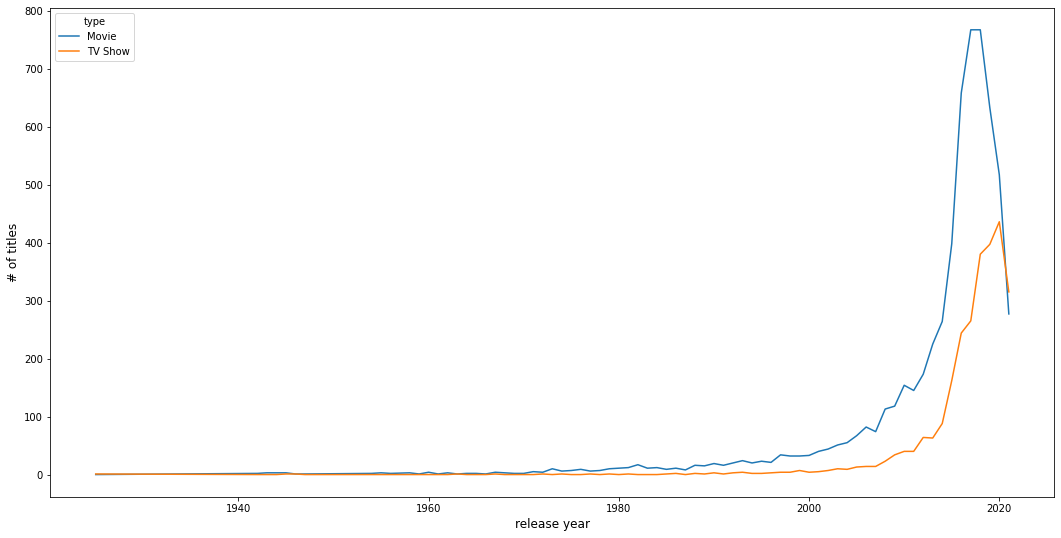

In [166]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.lineplot(data=netflix_titles_over_the_yrs, x="release_year", y="show_id", hue="type", ax=ax)
plt.ylabel("# of titles", fontsize=12)
plt.xlabel("release year", fontsize=12);

We're able to accomplish the task without the other columns, right? Of couse, **err on the side of caution and do EDA and sanity checks first.** 😅

In [94]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [95]:
cd data

/content/data


In [96]:
from google.colab import files
files.upload();

Saving mushrooms.csv to mushrooms (1).csv


In [97]:
cd /content

/content


In the case where you need to load many fields, but you still want to optimize on memory consumption, you can do the following:
- Compress the categorical (usually a string) fields with the `category` dtype
- Compress the numerical fields with `int` or `float` dtypes but with smaller magnitude

In [98]:
# https://www.kaggle.com/uciml/mushroom-classification
FILEPATH_MUSHROOMS = "data/mushrooms.csv"

In [99]:
df_mushrooms = pd.read_csv(FILEPATH_MUSHROOMS)
df_mushrooms.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

By default, when loading the data into pandas, without passing a schema, **pandas just "guesses" the dtype of the fields.**

In [100]:
df_mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [101]:
df_mushrooms.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Upon inspection, we see that the columns can fit in the `category` dtype, let's try passing a schema when loading the data.

In [102]:
df_mushrooms = pd.read_csv(FILEPATH_MUSHROOMS, dtype="category")
df_mushrooms.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [103]:
10.3e6 / 193.3e3 

53.28504914640455

Hooray! We've been able to shrink the memory usage down to **~50x times** just by changing the original object/string dtype to `category`

In [104]:
mkdir data

mkdir: cannot create directory ‘data’: File exists


In [105]:
cd data

/content/data


In [106]:
from google.colab import files
files.upload();

Saving mobile_price.csv to mobile_price (1).csv


In [107]:
cd /content

/content


In [108]:
# https://www.kaggle.com/iabhishekofficial/mobile-price-classification
FILEPATH_MOBILE_PRICE = "data/mobile_price.csv"

In [109]:
df_mobile_price = pd.read_csv(FILEPATH_MOBILE_PRICE)
df_mobile_price.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [110]:
df_mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [111]:
df_mobile_price.nunique()

battery_power    1275
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1333
px_width         1313
ram              2070
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [112]:
df_mobile_price.describe().loc[["min", "max"]]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
min,500.0,0.0,0.5,0.0,0.0,0.0,2.0,0.1,80.0,1.0,0.0,0.0,500.0,256.0,5.0,0.0,2.0,0.0,0.0,0.0
max,1999.0,1.0,3.0,1.0,19.0,1.0,64.0,1.0,200.0,8.0,20.0,1960.0,1998.0,3998.0,19.0,18.0,20.0,1.0,1.0,1.0


In [45]:
# just looking for floating points in the table

def is_whole_number(n):
    return n % 1 == 0

df_mobile_price.apply(is_whole_number, axis=1).sum(axis=0) / len(df_mobile_price)

battery_power    1.000000
blue             1.000000
clock_speed      0.076000
dual_sim         1.000000
fc               1.000000
four_g           1.000000
int_memory       1.000000
m_dep            0.051667
mobile_wt        1.000000
n_cores          1.000000
pc               1.000000
px_height        1.000000
px_width         1.000000
ram              1.000000
sc_h             1.000000
sc_w             1.000000
talk_time        1.000000
three_g          1.000000
touch_screen     1.000000
wifi             1.000000
dtype: float64

Let's recall some basic computing concepts:

For integers
- **int8** can store integers from -128 to 127.
- **int16** can store integers from -32768 to 32767.
- **int64** can store integers from -9223372036854775808 to 9223372036854775807.

In [49]:
schema = {
    "battery_power": "int16",
    "blue": bool,
    "clock_speed": "float32",
    "dual_sim": bool,
    "fc": "int8",
    "four_g": bool,
    "int_memory": "int8",
    "m_dep": "float32",
    "mobile_wt": "int16",
    "n_cores": "int8",
    "pc": "int8",
    "px_height": "int16",
    "px_width": "int16",
    "ram": "int16",
    "sc_h": "int8",
    "sc_w": "int8",
    "talk_time": "int8",
    "three_g": bool,
    "touch_screen": bool,
    "wifi": bool
}
df_mobile_price = pd.read_csv(FILEPATH_MOBILE_PRICE, dtype=schema)
df_mobile_price.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int16  
 1   blue           3000 non-null   bool   
 2   clock_speed    3000 non-null   float32
 3   dual_sim       3000 non-null   bool   
 4   fc             3000 non-null   int8   
 5   four_g         3000 non-null   bool   
 6   int_memory     3000 non-null   int8   
 7   m_dep          3000 non-null   float32
 8   mobile_wt      3000 non-null   int16  
 9   n_cores        3000 non-null   int8   
 10  pc             3000 non-null   int8   
 11  px_height      3000 non-null   int16  
 12  px_width       3000 non-null   int16  
 13  ram            3000 non-null   int16  
 14  sc_h           3000 non-null   int8   
 15  sc_w           3000 non-null   int8   
 16  talk_time      3000 non-null   int8   
 17  three_g        3000 non-null   bool   
 18  touch_sc

In [50]:
468.9e3 / 90.9e3 

5.158415841584159

Hooray! We've been able to shrink the memory usage down to **~5x times** just by changing the original `int64` and `float64` dtypes identified by pandas to smaller magnitude integer and float dtype counterparts (and boolean) categories accordingly.

Imagine this approach in an actual working dataset, you'll be surprised how efficient this technique can be in your own data science workflow, **not only it speeds up the subsequent processes, it also allows you to do more** since you have less usage of your compute resources. 😁

**WHAT WE'VE COVERED**
- How to leverage pandas `DataFrame`'s quirk of being a column-major data structure.
    - Use `Series` to speed up calculations as compared to a row-based approach.
    - Efficient chaining of operation by starting with the column slicing.
- How to correctly address the notorious `SettingWithCopy` warning of pandas.
    - Difference between a `Copy` and `View`.
    - How to mitigate the SettingWithCopy warning using `.loc()`.
- How to efficiently load a pandas dataframe into memory.
    - Use only relevant columns for the problem.
    - Make use of the category dtype in pandas for categorical data.
    - Make use of lower magnitude floats and integers for the data.


## What I expect from you after the session

Now that we've finished this session I expect you to 📚✍️👨‍🏫👩‍🏫👨‍🎓👩‍🎓

## REFERENCES

Here are some helpful references curated just for you!

Docs
- [Here is the PEP8 style guide in Python.](https://www.python.org/dev/peps/pep-0008/)
- [Here is pendulum's official documentation.](https://pendulum.eustace.io/docs/)
- [Here is pandas' official documentation.](https://pandas.pydata.org/docs/reference/index.html#api)
- [Here is geopandas' official documentation.](https://geopandas.org/en/stable/docs.html)
- [Here is pytest's official documentation.](https://docs.pytest.org/en/7.0.x/) 
- [Here is seaborn's official documentation.](https://seaborn.pydata.org/api.html)

Books
- [If you want to brush up on your python programming.](https://www.tomasbeuzen.com/python-programming-for-data-science/README.html)
- [If you want to learn more about inferential thinking.](https://inferentialthinking.com/chapters/intro.html)
- [If you want to learn more about geographic data science.](https://geographicdata.science/book/intro.html)

Blogs
- [If you want to learn more about test-driven development.](https://testdriven.io/blog/)